<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Task description</h1></div>

**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Installation scikit-learn-intelex</h1></div>

In [1]:
!pip install scikit-learn-intelex

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Reading data</h1></div>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [4]:
data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

In [5]:
data.shape

(103904, 25)

In [6]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
data.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
86327,86327,62221,Female,Loyal Customer,22,Personal Travel,Eco,2565,3,3,...,4,3,1,4,1,2,4,0,0.0,neutral or dissatisfied
48484,48484,43341,Male,Loyal Customer,23,Business travel,Business,3402,4,4,...,4,5,2,5,4,2,4,0,0.0,satisfied
82772,82772,38960,Male,disloyal Customer,27,Business travel,Business,313,2,2,...,1,3,3,3,1,4,1,40,13.0,neutral or dissatisfied
57750,57750,70691,Male,Loyal Customer,24,Personal Travel,Eco,447,2,4,...,4,2,2,3,1,3,4,0,26.0,neutral or dissatisfied
82941,82941,122207,Female,Loyal Customer,55,Business travel,Business,544,4,4,...,5,5,4,5,3,5,4,71,84.0,satisfied
67712,67712,99278,Male,Loyal Customer,35,Business travel,Business,833,4,4,...,4,4,4,4,3,4,4,0,0.0,satisfied
18756,18756,68018,Female,Loyal Customer,61,Business travel,Eco,304,4,4,...,5,5,4,5,1,5,2,0,0.0,satisfied
23093,23093,11320,Female,Loyal Customer,32,Personal Travel,Eco,316,2,4,...,2,1,1,4,4,3,2,0,0.0,neutral or dissatisfied
99196,99196,71962,Male,disloyal Customer,25,Business travel,Business,1440,5,0,...,4,3,5,4,4,5,4,0,2.0,satisfied
4554,4554,18323,Female,Loyal Customer,36,Personal Travel,Eco,715,1,5,...,5,4,5,3,2,4,5,114,103.0,neutral or dissatisfied


In [8]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Sonuçların Yorumu

* Arrival Delay in Minutes özelliğine karşılık gelen sütunda 310 eksik değer vardır. 

* İlk iki özellik işe yaramaz ve sınıflandırmayı etkilemeyecektir, bu nedenle bunlardan kurtulmalısınız.

* Birçok sütun kategorik değerler içerir ancak 'object' veya 'int64' türündedir. Bu türü kategorik değerleri depolamak için tasarlanmış özel bir türle değiştirelim.  

In [10]:
data = data.drop(data.iloc[:,[0,1]], axis = 1)

In [11]:
categorical_indexes = [0,1,3,4] + list(range(6,20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Target = satisfaction

In [13]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [14]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


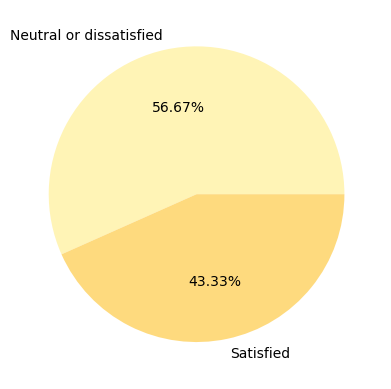

In [15]:
plt.pie(data.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], colors=sns.color_palette("YlOrBr"), autopct='%1.2f%%')
plt.show()

Dengeli bir dağılım olduğunu söyleyebilir miyiz


In [16]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


In [17]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


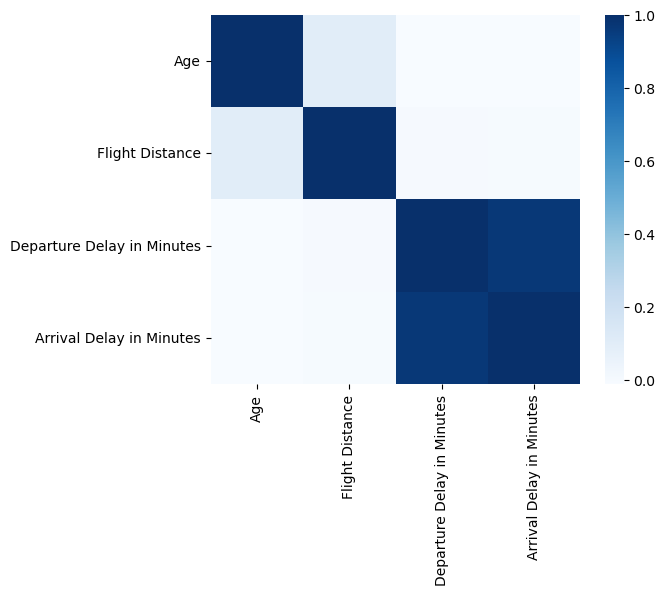

In [18]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

'Departure delay in minutes' ve 'Arrival delay in minutes' arasında korelasyon olduğunu görüyoruz. 

In [19]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

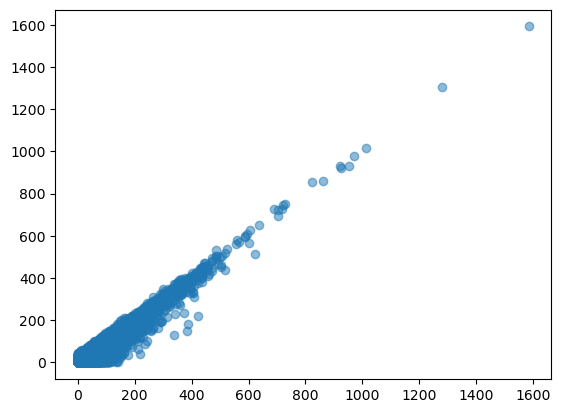

In [20]:
plt.scatter (data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

Noktaların sol alt köşeden sağ üst köşeye giden düz bir çizgi boyunca aşağı yukarı sıralandığını görebilirsiniz. Dolayısıyla, yaklaşık olarak varış zamanı gecikmesinin kalkış zamanı gecikmesine bağımlılığı doğrusaldır.

Elde edilen sonuçlar oldukça mantıklıdır ve aşağıdaki şekilde açıklanabilir. Havayolu şirketinin müşterilerinin uçuşu kalkışta belirli bir süre gecikmişse, inişte de yaklaşık aynı süre gecikecektir (uçağın kayıp zamanı telafi etmek için uçuş sırasında hızlanmaması şartıyla).

Kategorik özelliklerin her biri için değerlerin oranını göz önünde bulundurma:

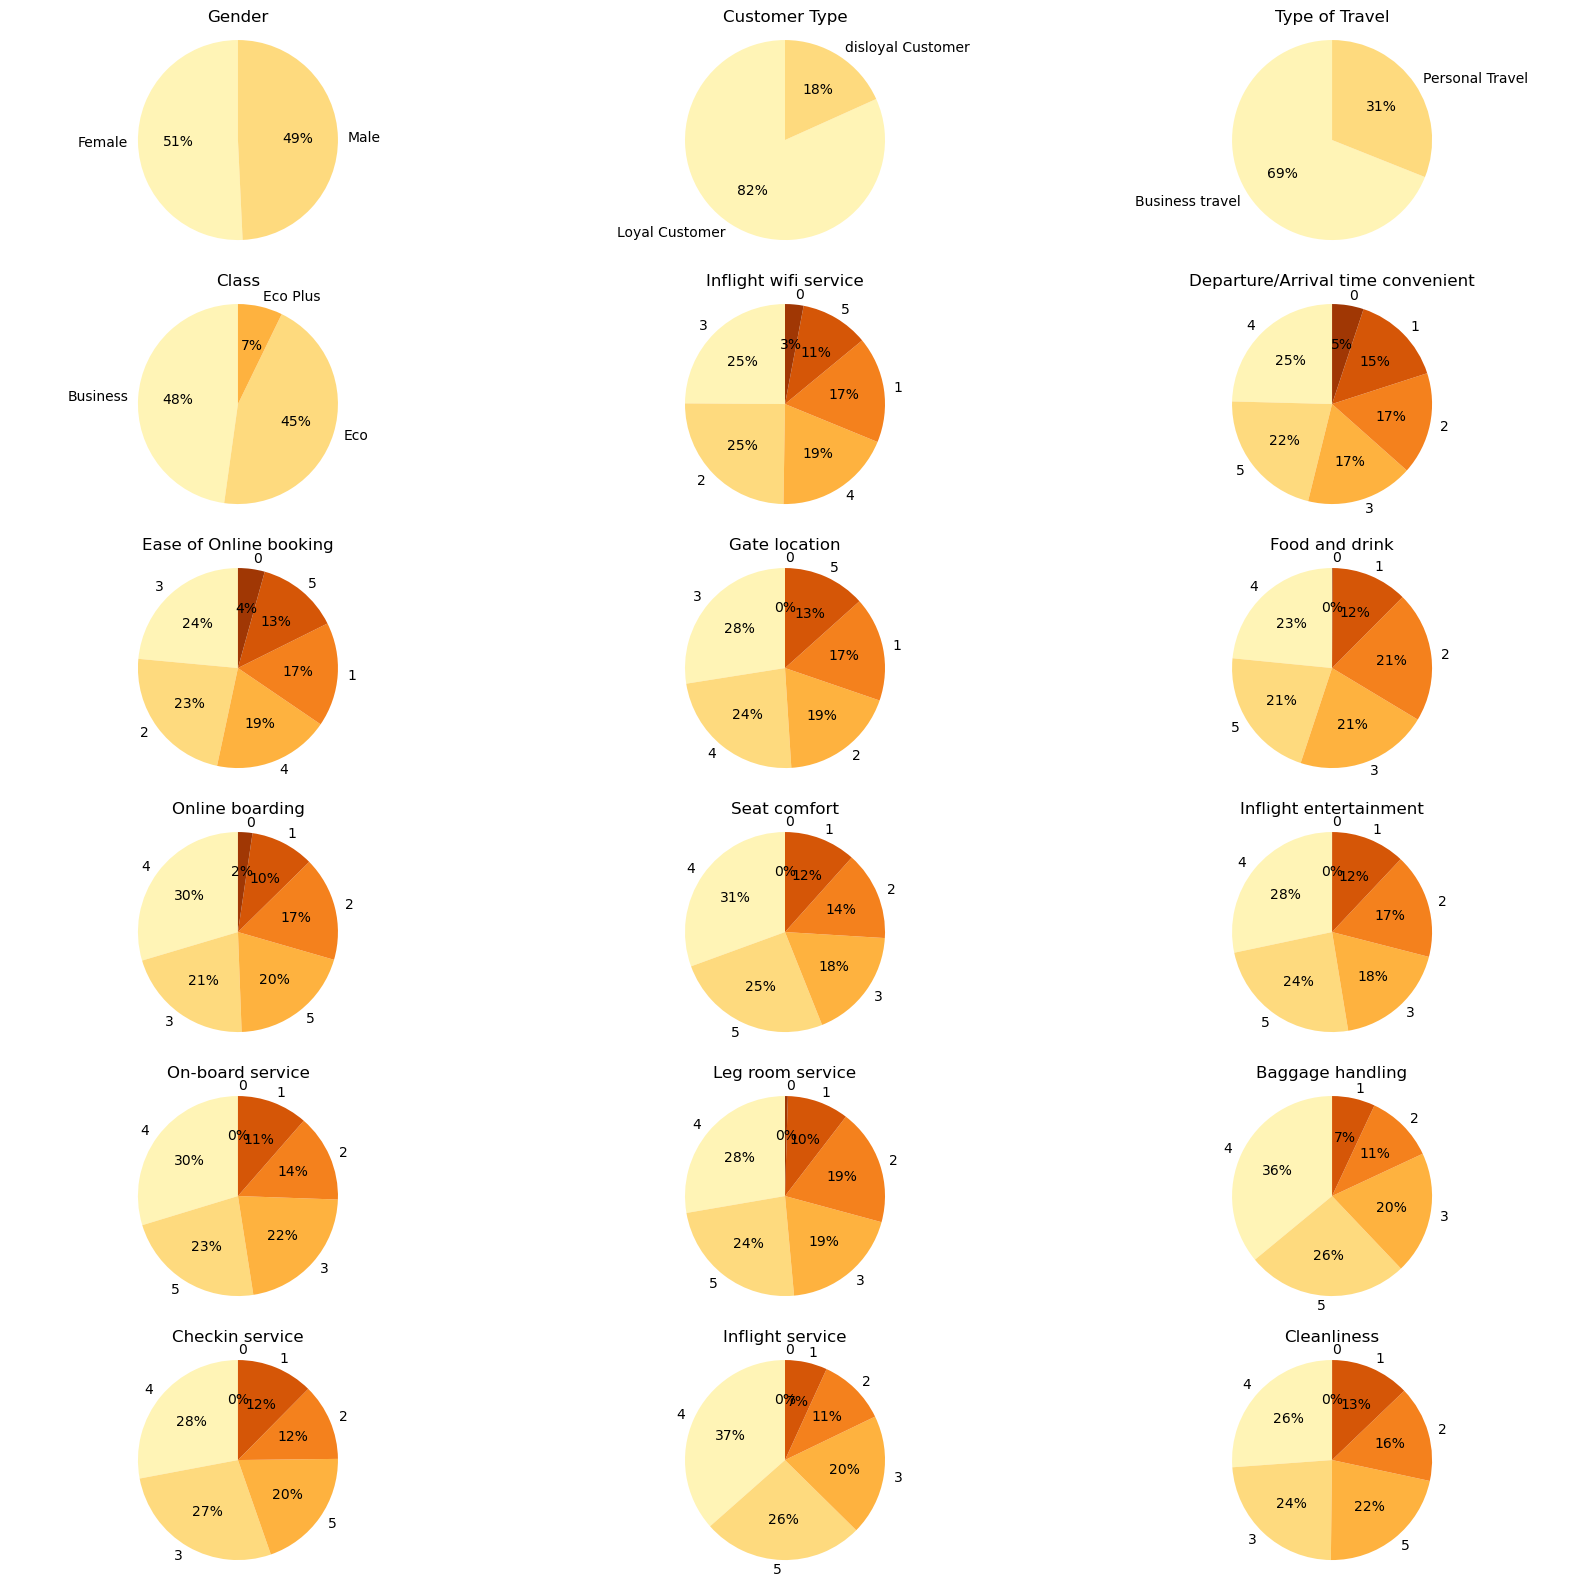

In [21]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Ele alınan örneklem hakkında bazı sonuçlar:

- Bu örneklemdeki erkek ve kadın sayısı yaklaşık olarak aynıdır.
- Havayolu şirketinin müşterilerinin büyük çoğunluğu sürekli müşterilerdir.
- Müşterilerimizin çoğu kişisel nedenlerden ziyade iş için uçtu.
- Yolcuların yaklaşık yarısı business sınıfındaydı.
- Yolcuların %60'ından fazlası bagaj taşıma hizmetinden memnun kaldı (5 üzerinden 4-5 puan)
- Yolcuların %50'sinden fazlası koltuklarında otururken rahattı (5 üzerinden 4-5 puan)

Şimdi birkaç "boxes with whiskers" (kutu diyagramlarına) bakalım.

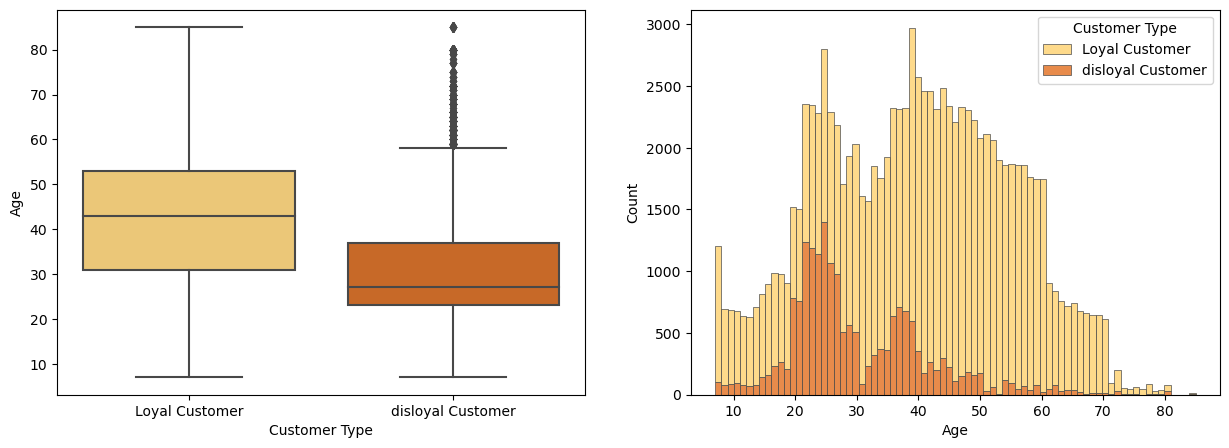

In [22]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Bu box diyagramından, havayolunun düzenli müşterilerinin çoğunun 30 ila 50 yaşları arasında olduğu sonucuna varabiliriz (ortalama yaşları 40'ın biraz üzerindedir). Düzenli olmayan müşterilerin yaş aralığı biraz daha küçüktür (ortalama olarak 25 ila 40 yaş arası - 30'dan biraz daha az).

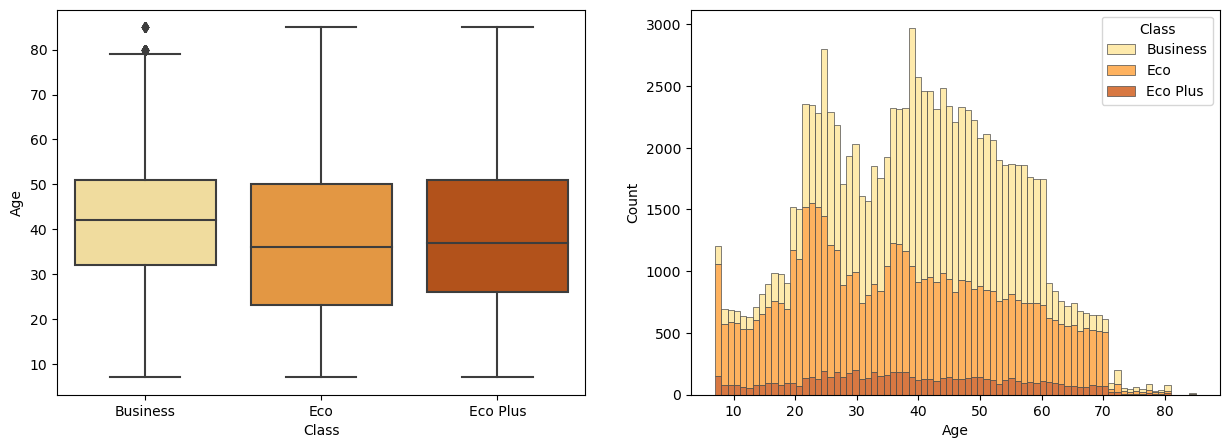

In [23]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Ortalama olarak, business sınıfında seyahat eden müşterilerin yaş aralığının (bir önceki box grafiğine göre) normal müşterilerin yaş aralığı ile aynı olduğu görülebilir. Bu gözleme dayanarak, düzenli müşterilerin business class'ı çoğunlukla kendileri için satın aldıkları varsayılabilir.

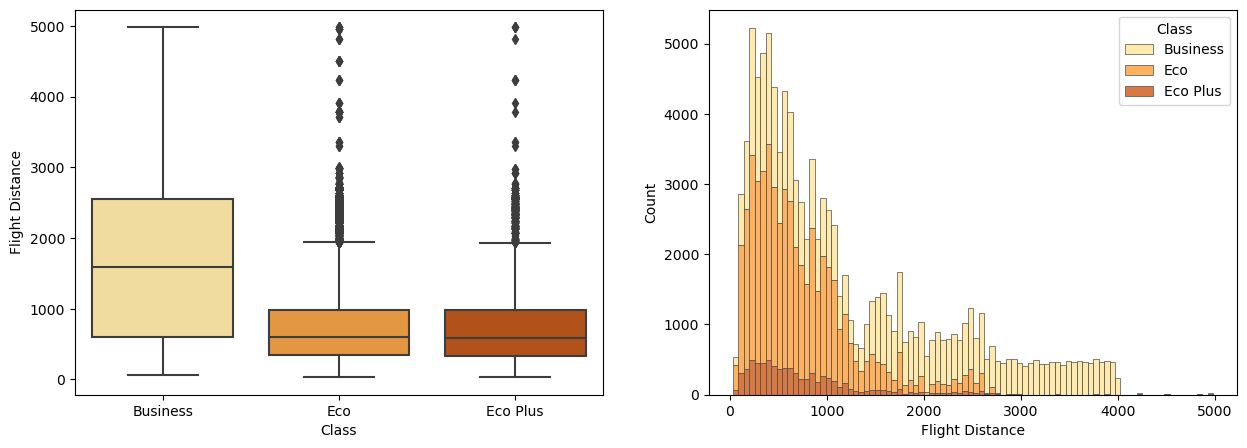

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Bu box diyagramından şu sonuç çıkarılabilir: uçuş mesafesi uzun olan müşteriler çoğunlukla business sınıfında uçmaktadır.

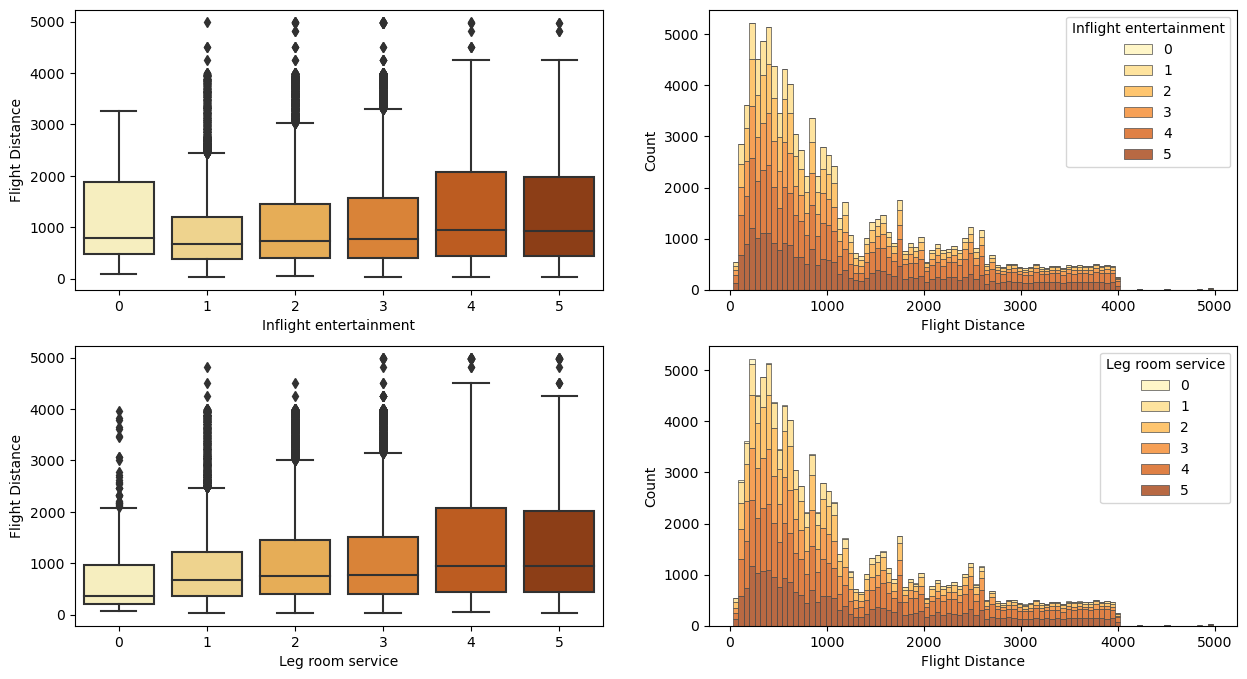

In [25]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

Şu pattern görülebilir: bir uçak yolcusu ne kadar çok mesafe kat ederse (sırasıyla, ne kadar uzun süre uçuşta kalırsa), uçuştaki eğlenceden ve ekstra bacak boşluğundan (ortalama olarak) o kadar çok memnun kalmaktadır.

Şimdi bazı kategorik özelliklerin hedefe - hava yolcularının memnuniyetine - bağımlılık grafiklerini ele alalım:

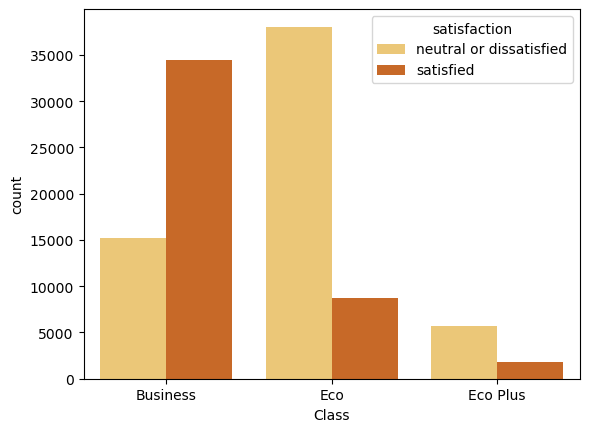

In [26]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Bu grafik çok açıklayıcı. Ekonomi plus veya ekonomi sınıfında uçan yolcuların çoğunun uçuştan memnun olmadığını, business sınıfında uçacak kadar şanslı olanların ise memnun olduğunu görebilirsiniz.

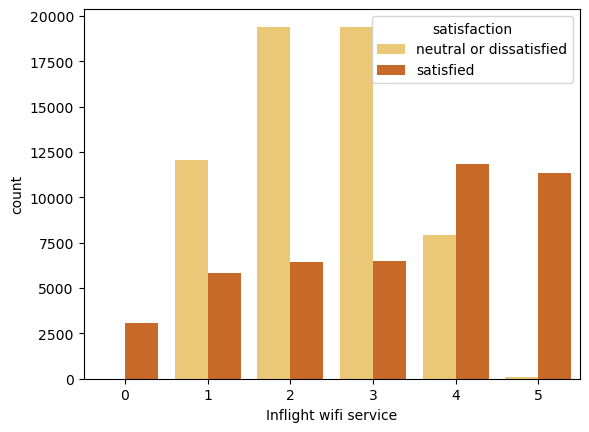

In [27]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Bu grafiğe göre, wifi hizmetine 5 üzerinden 5 puan veren yolcuların neredeyse tamamının uçuştan memnun kaldığını görebilirsiniz.

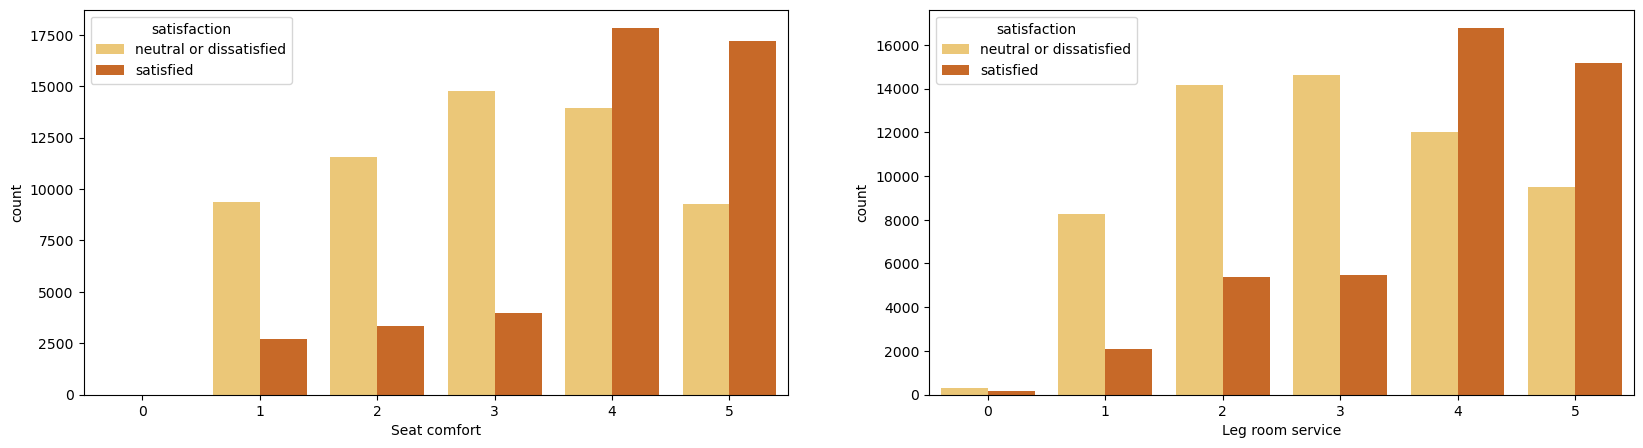

In [28]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()

Yukarıdaki grafiklerden şu sonuca varabiliriz: koltukların konforunu ve ekstra diz mesafesini 5 üzerinden 4 ve 5 puanla değerlendiren yolcuların çoğu uçuştan memnun kalmıştır.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Filling in missing values</h1></div>

In [29]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [30]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103904.0,15.133392,38.649776,0.0,0.0,0.0,13.0,1584.0


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Handling categorical features
</h1></div>

In [32]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

In [33]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [34]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


In [35]:
data[col] == uniq

0         False
1          True
2          True
3          True
4          True
          ...  
103899     True
103900     True
103901     True
103902     True
103903     True
Name: Type of Travel, Length: 103904, dtype: bool

In [36]:
for col in binary_columns:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.loc[data[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(data[col].describe(), end = '\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



Şimdi ikili olmayan kategorik özelliklere bakalım:

In [37]:
data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


Aşağıdaki vektörleştirme yöntemi, ikili olmayan özellikler için geçerlidir:

s değer alan özellik j, orijinal özellik j'nin değerinin ne olduğuna bağlı olarak 0 veya 1 değerlerini alan s özelliklerle değiştirilecektir.

Bu vektörleştirme, get_dummies yöntemiyle gerçekleştirilir:

In [38]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [39]:
len(data_nonbinary.columns)

86

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Normalization of quantitative features
</h1></div>

In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Tüm nicel özellikler için bir standardizasyon (tüm değerleri sıfır ortalama ve bir standart sapmaya indirgeyen doğrusal dönüşüm) gerçekleştirelim:

In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [42]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Table formation
</h1></div>

Dönüştürülen tüm sütunları tek bir tabloda birleştiriyoruz:

In [43]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


In [44]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>Splitting the data on training and test sets

</h2></div>

In [45]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [46]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [47]:
y


0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

Verileri 9:1 oranında eğitim ve test örneklerine ayıralım (%90 -training sample, %10 - test):

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93513, 10391)

In [49]:
X_train = X_train.values
y_train = y_train.values

In [50]:
X_test = X_test.values
y_test = y_test.values

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>K-nearest neighbors (kNN) method</h2></div>

In [51]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 10)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.05251676237528472
Error on the test sample:  0.06544124723318256


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>SVC</h2></div>

In [52]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.04965085068386214
Error on the test sample:  0.050235780964296026


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>Random Forest</h2></div>

In [53]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  6.416220204677425e-05
Error on the test sample:  0.03724376864594361


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>Extremely Randomized Trees</h2></div>

In [54]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0
Error on the test sample:  0.0396496968530459


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>AdaBoost</h2></div>

In [55]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0702576112412178
Error on the test sample:  0.07160042344336445


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>GBT</h2></div>

In [56]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.055286430763637144
Error on the test sample:  0.056394957174477914


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #9370D8; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h2>General conclusions</h2></div>

## Ele alınan örneklem hakkında sonuçlar:

- Örneklem aşağı yukarı dengelidir (%43,3'e %56,7).
- Bu örneklemdeki erkek ve kadın sayısı yaklaşık olarak aynıdır.
- Havayolu şirketinin müşterilerinin büyük çoğunluğu tekrar eden müşterilerdir.
- Müşterilerimizin çoğu kişisel nedenlerden ziyade iş için uçmuştur.
- Yolcuların yaklaşık yarısı business sınıfındaydı.
- Yolcuların %60'ından fazlası bagaj taşıma hizmetinden memnun kalmıştır (5 üzerinden 4-5 puan).
- Yolcuların %50'sinden fazlası koltuklarında otururken rahattı (5 üzerinden 4-5 puan).
- 'Dakika cinsinden kalkış gecikmesi' ve 'Dakika cinsinden varış gecikmesi' özellikleri arasında güçlü bir korelasyon (%96) vardı (bu oldukça mantıklıdır ve yukarıda ayrıntılı olarak tartışılmıştır).
- Havayolunun düzenli müşterilerinin çoğu 30 ila 50 yaşları arasındadır (ortalama 40'ın biraz üzerindedir). Düzenli olmayan müşterilerin yaş aralığı biraz daha küçüktür (25 ila 40 yaş arasında, ortalama 30'dan biraz daha az).
- Uçuş mesafesi uzun olan müşteriler business sınıfında uçma eğilimindedir.
- Bir uçak yolcusu ne kadar çok mesafe kat ederse (sırasıyla, ne kadar uzun süre uçuşta kalırsa), uçak içi eğlence ve ekstra diz mesafesinden (ortalama olarak) o kadar memnun kalmaktadır.
- Economy Plus veya Economy Class'ta uçan yolcuların çoğu uçuştan memnun kalmazken, Business Class'ta uçacak kadar şanslı olanlar memnun kaldı.
- Wifi hizmetini 5 üzerinden 5 olarak değerlendiren yolcuların neredeyse tamamı uçuştan memnun kaldı.
- Koltukların konforunu ve ekstra diz mesafesini 5 üzerinden 4 ve 5 puanla değerlendiren yolcuların çoğunluğu uçuştan memnun kaldı.

## Sınıflandırma sonuçlarına ilişkin sonuçlar:

- kNN yöntemi için eğitim setindeki hata %5,2 ve test setindeki hata %6,5 olmuştur.
- Destek vektör makinesi için hem eğitim hem de test setlerindeki hata %5'tir.
- Rastgele Orman ve Aşırı Rastgele Orman sınıflandırıcıları için eğitim setinde hata gözlenmemiştir, ancak test setinde hata %3,9'dur.
- AdaBoost algoritması için eğitim setindeki hata %7, test setindeki hata ise %7,2'dir.
- Gradyan destekli karar ağaçları için eğitim ve test örneklerindeki hata sırasıyla %5,5 ve %5,6 olmuştur.
- Random ve Extremely Random Forest sınıflandırıcıları en iyi sonucu göstermiştir (test örneğindeki hata %3,9'dur).

Bu Notebook https://www.kaggle.com/code/frixinglife/airline-passenger-satisfaction-part-1 adresinden alınmıştır,notebook üzerinde bazı hatalar giderilmiştir ve yorumlar tekrar değerlendirilerek türkçeye çevrilmiştir. Teşekkürler.